In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pyreadstat

In [15]:
file_path = ".\\BASEDATOS_ARGENTINA_122_ .sav"

In [76]:
df_diputados, meta = pyreadstat.read_sav(file_path)
df = df_diputados
type(df)

pandas.core.frame.DataFrame

# Análisis Exploratorio

#### Explicación del dataset:- Este dataset proviene de una encuesta realizada por el Instituto de Iberoamérica de la Universidad de Salamanca, España, en el año 2022. La encuesta tiene como objetivo recopilar las opiniones de los diputados argentinos sobre una variedad de temas políticos y legislativos.
- La unidad de análisis del dataset son los Diputados Argentinos del 2022.


In [37]:
df.head(5)

,Encuestado,País,legis,partido,departa,tipoelec,comision01,comision02,comision03,comision04,...,pcontacto2,pcontacto3,resultado1,resultado107,causaneg1,resultado2,causaneg2,resultado3,causaneg3,peso
0,4.0,1.0,2022.0,20.0,12.0,2.0,7.0,16.0,31.0,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.040102
1,6.0,1.0,2022.0,7.0,2.0,2.0,2.0,3.0,15.0,25.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
2,10.0,1.0,2022.0,2.0,15.0,2.0,1.0,2.0,3.0,4.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.838407
3,11.0,1.0,2022.0,7.0,2.0,2.0,5.0,15.0,27.0,35.0,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,0.938927
4,12.0,1.0,2022.0,29.0,9.0,2.0,37.0,38.0,NaN,NaN,...,NaN,NaN,1.0,,NaN,NaN,NaN,NaN,NaN,1.096378


In [39]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 111 filas y 266 columnas


In [41]:
df.dtypes

Encuestado    float64
País          float64
legis         float64
partido       float64
departa       float64
               ...   
resultado2    float64
causaneg2     float64
resultado3    float64
causaneg3     float64
peso          float64
Length: 266, dtype: object

# Hipótesis 1:
#### Existe una relación entre el posicionamiento ideológico de los diputados y el grado de importancia que le asignan a la inseguridad: 
 
- Aquellos diputados posicionados más a la derecha perciben la inseguridad como un problema más importante que aquellos situados a la izquierda.

In [128]:
df_hip1 = df[["ID101", "PRO102"]]

In [120]:
#Var Independiente: 
#ID101: Posicionamiento Izq - Der de diputados: En una escala donde 1 es la Izquierda y 10 es la Derecha
df_hip1["ID101"].unique()

array([ 5.,  7.,  3.,  9.,  1.,  6.,  2.,  4., 99.,  8.])

In [130]:
#Eliminar categorías residuales
df_hip1 = df_hip1[(df_hip1['ID101'] != 98) & (df_hip1['ID101'] != 99)] #Elimino valores de 98 (NS) y 99 (NC) de la variable
df_hip1["ID101"].unique() # Observacion: ningun diputado se coloca en el extremo de la derecha (10) pero sí en el extremo de la izq (1)

array([5., 7., 3., 9., 1., 6., 2., 4., 8.])

In [132]:
df_hip1.shape #Se elimina una fila (Un diputado) del dataset

(110, 2)

In [134]:
# Var Dependiente
# PRO102:  Qué grado de importancia tiene hoy en Argentina la INSEGURIDAD como problema en la Arg, siguiendo una escala de 1 a 10, donde 1 significa "no es unacuestión importante" y el 10 "es una cuestión muy importante"?
df_hip1["PRO102"].unique() 

array([ 7.,  9., 10.,  3.,  8.,  4.,  5.,  6.])

In [136]:
df_hip1[["ID101", "PRO102"]].isna().sum() #No hay nulos

ID101     0
PRO102    0
dtype: int64

### Análisis Gráfico

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

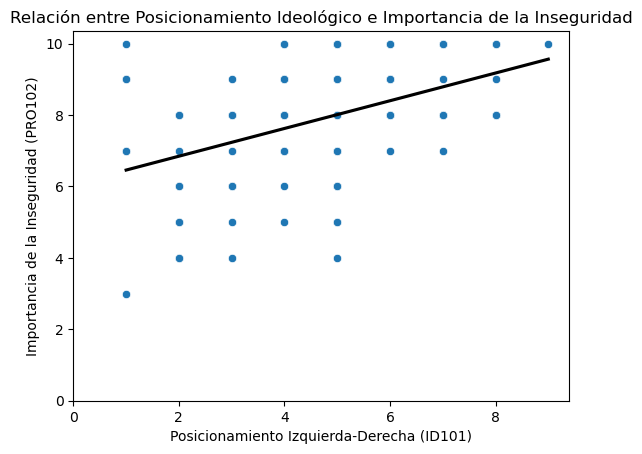

In [138]:
# Scatterplot con línea de regresión
sns.scatterplot(x="ID101", y="PRO102", data=df_hip1)
sns.regplot(x="ID101", y="PRO102", data=df_hip1, ci=None, scatter=False, line_kws={'color': 'black'}) #insertar recta de regresión
plt.xlabel("Posicionamiento Izquierda-Derecha (ID101)")
plt.ylabel("Importancia de la Inseguridad (PRO102)")
plt.title("Relación entre Posicionamiento Ideológico e Importancia de la Inseguridad")
plt.xlim(0, None) #Empezar ejes en 0 
plt.ylim(0, None) 
plt.show()

### Correlación de Pearson

In [140]:
#Correalción 
corr_1 = df_hip1["ID101"].corr(df_hip1["PRO102"])
print(f'Correlación de Pearson: {corr_1:.2f}')

Correlación de Pearson: 0.44


### Regresión Lineal

In [142]:
#Regresión Lineal Posicionamiento Político - Importancia de la Inseguridad como problema
# Paso 3: Ajustar el modelo de regresión lineal
x = sm.add_constant(df_hip1["ID101"])
y = df_hip1["PRO102"]

modelo_1 = sm.OLS(y, x).fit()

# Mostrar el resumen del modelo
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 PRO102   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     25.69
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.67e-06
Time:                        21:11:30   Log-Likelihood:                -198.68
No. Observations:                 110   AIC:                             401.4
Df Residuals:                     108   BIC:                             406.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0710      0.393     15.461      0.0

### Resultados:

- R2: indica que el 19,2% de la variación de la variable dependiente (Importancia de la inseguridad) se explica por la variable independiente (Posicionamiento izquierda-derecha). Si bien hay relación, no es fuerte; esto explica que hay otros factores que influyen en la variable dependiente.
- Coeficiente de ID101: indica que por cada unidad que aumenta el Posicionamiento izquierda-derecha, Importancia de la inseguridad **aumenta** 0,3882.
- Constante de ID101: cuando el Posicionamiento izquierda-derecha es 0, Importancia de la inseguridad es 6,071.
- Significatividad de ID101: 0.000. Al ser menor a 0.05, indica que la relación es estadísticamente significativo al 95% de confianza. Por lo que se puede decir que existe una alta probabilidad de que el efecto de la VI sobre la VD sea real y no se deba al azar.
- En conclusión, hay una relación positiva y significativa entre el Posicionamiento izquierda-derecha y la Importancia de la inseguridad; mientras más a la derecha se ubica un diputado, más importancia le otorga a la inseguridad. Sin embargo, el valor del R2 indica que la variable independiente explica solo el 20% de la variación de la dependiente, por lo que aunque la VI tiene un efecto significativo sobre la VD no es el único factor que la influye.

# Hipótesis 2:
#### Existe una relación entre la Independencia del Poder Judicial y el Grado de corrupción entre los jueces.
- Aquellos diputados con una percepción de la independencia del Poder Judicial menor, creen que hay un mayor grado de corrupción entre los jueces.

In [144]:
df_hip2 = df[["PJ101", "CO207"]]

In [146]:
#Var Independiente: 
#PJ101: Percecpción de la Independencia del Poder Judicial: En una escala donde 1 es "Mínima dependencia" y 10 es "Máxima dependencia".
df_hip2["PJ101"].unique()

array([ 2.,  3.,  1.,  4.,  6.,  5., 10.,  7.,  8., 99.])

In [148]:
#Eliminar categorías residuales
df_hip2 = df_hip2[(df_hip2['PJ101'] != 98) & (df_hip2['PJ101'] != 99)] #Elimino valores de 98 (NS) y 99 (NC) de la variable
df_hip2["PJ101"].unique()

array([ 2.,  3.,  1.,  4.,  6.,  5., 10.,  7.,  8.])

In [150]:
df_hip2.shape #Se elimina una fila (Un diputado) del dataset

(110, 2)

In [152]:
# Var Dependiente
# PRO102:  Percepción del grado de corrupción entre los Jueces, siguiendo una escala de 1 a 4, donde 1 significa "Ninguna" y el 4 es "Mucha".
df_hip2["CO207"].unique() 

array([2., 3., 4., 1., 8.])

In [154]:
#Eliminar categorías residuales
df_hip2 = df_hip2[(df_hip2['CO207'] != 8) & (df_hip2['CO207'] != 9)] #Elimino valores de 8 (NS) y 9 (NC) de la variable
df_hip2["CO207"].unique()

array([2., 3., 4., 1.])

In [156]:
df_hip2.shape ##Se eliminan otras dos filas (dos diputados) del dataset

(108, 2)

In [158]:
df_hip2[["PJ101", "CO207"]].isna().sum() #No hay nulos

PJ101    0
CO207    0
dtype: int64

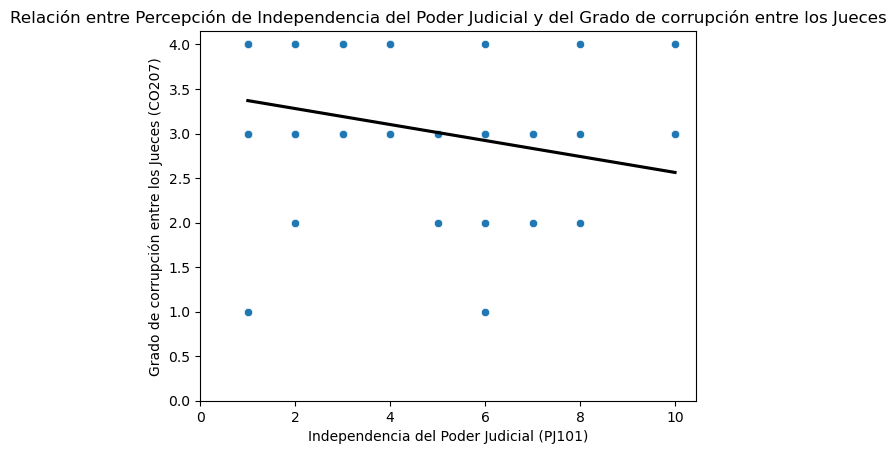

In [160]:
# Scatterplot con línea de regresión
sns.scatterplot(x="PJ101", y="CO207", data=df_hip2)
sns.regplot(x="PJ101", y="CO207", data=df_hip2, ci=None, scatter=False, line_kws={'color': 'black'}) #insertar recta de regresión
plt.xlabel("Independencia del Poder Judicial (PJ101)")
plt.ylabel("Grado de corrupción entre los Jueces (CO207)")
plt.title("Relación entre Percepción de Independencia del Poder Judicial y del Grado de corrupción entre los Jueces")
plt.xlim(0, None) #Empezar ejes en 0 
plt.ylim(0, None) 
plt.show()

In [162]:
#Correalción 
corr_2 = df_hip2["PJ101"].corr(df_hip2["CO207"])
print(f'Correlación de Pearson: {corr:.2f}')

Correlación de Pearson: -0.31


In [164]:
#Regresión Lineal Independencia del Poder Judicial - Grado de corrupción entre los Jueces
# Paso 3: Ajustar el modelo de regresión lineal
x = sm.add_constant(df_hip2["PJ101"])
y = df_hip2["CO207"]

modelo_2 = sm.OLS(y, x).fit()

# Mostrar el resumen del modelo
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  CO207   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.90
Date:                Sun, 27 Oct 2024   Prob (F-statistic):            0.00131
Time:                        21:12:08   Log-Likelihood:                -106.24
No. Observations:                 108   AIC:                             216.5
Df Residuals:                     106   BIC:                             221.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4596      0.125     27.622      0.0

### Resultados:

- R2: indica que el 9,3% de la variación de la variable dependiente (Grado de corrupción entre los Jueces) se explica por la variable independiente (Independencia del Poder Judicial). Si bien hay relación, es débil; esto explica que hay otros factores que influyen en la variable dependiente.
- Coeficiente de PJ101: indica que por cada unidad que aumenta la Independencia del Poder Judicial, Grado de corrupción entre los jueces **disminuye** 0,0896.
- Constante de PJ101: cuando la Independencia del Poder Judicial es 0, Grado de corrupción entre los jueces es 3,4596.
- Significatividad de PJ101: 0.001. Al ser menor a 0.05, indica que la relación es estadísticamente significativo al 95% de confianza. Por lo que se puede decir que existe una alta probabilidad de que el efecto de la VI sobre la VD sea real y no se deba al azar.
- En conclusión, hay una relación negativa y significativa estadísticamente entre la percepción de Independencia del Poder Judicial y la percepción del Grado de corrupción entre los Jueces ; mientras más grande es la percepción de dependencia del Poder Judicial, menor es la percepción de corrupción entre los jueces. Sin embargo el bajo valor de R² indica que el modelo no es muy efectivo y que la relación es débil. Esto sugiere que hay otros factores que logran explicar la variable dependiente. Por lo que no se puede comprobar nuestra Hipótesis 2.

# Hipótesis 3:
#### ...
- ...